# Similarity Modeling

## Versions

In [1]:
!python --version
!conda list |grep -E "pandas|numpy|seaborn|librosa|opencv"

Python 3.8.5
libopencv                 4.4.0                    py38_2    conda-forge
librosa                   0.8.0              pyh9f0ad1d_0    conda-forge
numpy                     1.19.2           py38h456fd55_0  
numpy-base                1.19.2           py38hcfb5961_0  
opencv                    4.4.0                    py38_2    conda-forge
pandas                    1.1.3            py38hb1e8313_0  
py-opencv                 4.4.0            py38h23f93f0_2    conda-forge
seaborn                   0.11.0                     py_0  


## Global Vars and Imports

In [145]:
## imports
import pandas as pd
import numpy as np
import librosa as lr
import cv2
import os.path
import matplotlib
import seaborn as sns

from skimage.color import rgb2gray

## vars
check_for_data = True
create_feature_data = True

## Check for Data

In [3]:
if check_for_data == True:
    print("checking for raw movies.mp4 files...")
    files = ["Muppets-02-01-01.avi", "Muppets-02-04-04.avi", "Muppets-03-04-03.avi"]
    for f in files:
        print("../media/"+f)
        os.path.isfile("../media/"+f)
    print("all present!")

checking for raw movies.mp4 files...
../media/Muppets-02-01-01.avi
../media/Muppets-02-04-04.avi
../media/Muppets-03-04-03.avi
all present!


## Load Ground Truth

In [4]:
gt1 = pd.read_csv("../data/gt/gt_02_04_04.csv.csv", delimiter=",", na_values="")
gt1.fillna(0).head()

,Min,Sec,kermit_video,kermit_audio,ws_video,ws_audio
0,0,0,0.0,0,0.0,0.0
1,0,1,0.0,0,0.0,0.0
2,0,2,0.0,0,0.0,0.0
3,0,3,0.0,0,0.0,0.0
4,0,4,0.0,0,0.0,0.0


## Extract Frames

In [128]:
vcap = cv2.VideoCapture('../media/Muppets-02-04-04.avi')
success,image = vcap.read()
count = 0
imgs = []
while success and count < 5000:
#while success:
    #imgs.append(image) # BGR
    imgs.append(image[:, :, ::-1]) #the scikit image way is RGB, openCV is BGR...
    success,image = vcap.read()
    count += 1

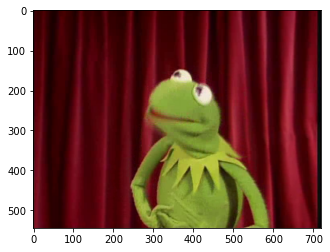

In [194]:
imgs[2550].shape
test_g = rgb2gray(test)
plt.imshow(test)
#np.interp(rgb2gray(test), (0, 255), (0, 1))

(544, 720)


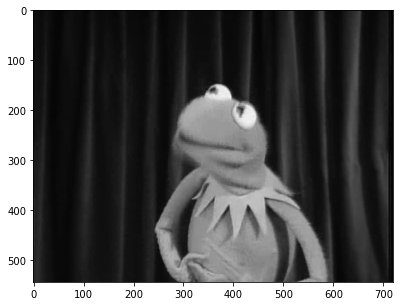

In [190]:
test = imgs[2550].copy()
#test[test[:,:,1]>100] = [0,255,0]
print(test[:,:,1].shape)
plt.figure(figsize=(10,5))
plot = plt.imshow(rgb2gray(test), cmap="gray")
#plot = plt.imshow(rgb2gray(test[:,:,1]), cmap="gray")

#imgs[2030][imgs[2030][:,:,1]>100].shape

<ipython-input-192-2ff1b2a5f1bd>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  plot = plt.imshow(rgb2gray(test[:,:,1]), cmap="gray")


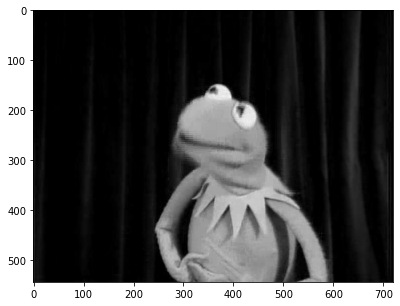

In [192]:
plt.figure(figsize=(10,5))
plot = plt.imshow(rgb2gray(test[:,:,1]), cmap="gray")


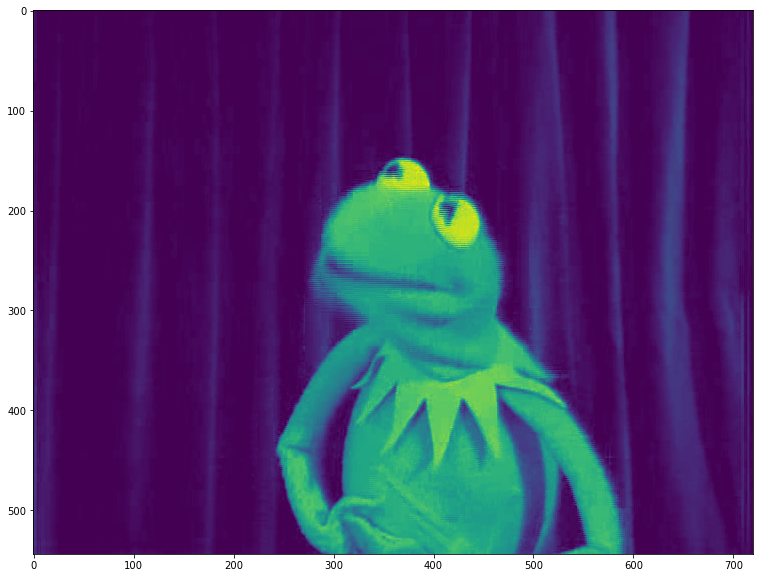

In [115]:
#cv2.imshow('',imgs[2000])
#cv2.waitKey(2)
#cv2.destroyAllWindows()

plt.figure(figsize=(20,10))
plot = plt.imshow(imgs[2550][:,:,1])